In [2]:
import os
import pandas as pd

In [3]:
main_path = "political_dataset/Data_News_2024/"
news_data_folders = [x for x in os.listdir(main_path) if ".zip" not in x]

In [4]:
cnn_path = main_path + "AAAI2024CNNCommentsParsed/"

In [5]:
cnn_path

'political_dataset/Data_News_2024/AAAI2024CNNCommentsParsed/'

In [6]:
os.listdir(cnn_path)

['metadata', 'extracted_text_cnn', 'jsonbyline']

In [7]:
#os.listdir(cnn_path+"metadata")

In [8]:
#open("political_dataset/Data_News_2024/AAAI2024CNNCommentsParsed/jsonbyline/3FIpwVJffXk_jsonbyline.txt").read()

In [9]:
df = pd.read_csv("political_dataset/Data_News_2024/AAAI2024CNNCommentsParsed/metadata/dzl5Yx5-hDw_metadata.csv")

In [10]:
from tqdm import tqdm

In [11]:
dataframe = []
for news in news_data_folders:
    news_data_path = main_path+news+"/metadata/"
    news_data = os.listdir(news_data_path)
    for file in tqdm(news_data):
        df = pd.read_csv(news_data_path+file)
        df['news'] = [news]*len(df)
        dataframe.append(df)
df_final = pd.concat(dataframe, ignore_index=True)

100%|██████████| 17942/17942 [05:44<00:00, 52.12it/s]


In [12]:
df_final.to_csv("final_combined_news_channel_data.csv", index = False)

In [13]:
df_final.head(1)

,commentId,videoId,uniqueAuthorId,authorChannelUrl,author,likeCount,publishedAt,updatedAt,totalReplyCount,isPublic,news
0,UgyObNOCTq2-f29Vu014AaABAg,dzl5Yx5-hDw,@markio2010,@markio2010,@markio2010,0,2024-07-30T21:51:44Z,2024-07-30T21:52:18Z,0,True,AAAI2024CNNCommentsParsed


In [14]:
df_final[df_final["commentId"] == "UgxBe5QOZp3en7lmBBd4AaABAg"]

,commentId,videoId,uniqueAuthorId,authorChannelUrl,author,likeCount,publishedAt,updatedAt,totalReplyCount,isPublic,news
766176,UgxBe5QOZp3en7lmBBd4AaABAg,_6rQmvko18M,@thetasworld,@thetasworld,@thetasworld,0,2024-07-21T04:38:40Z,2024-07-21T04:38:54Z,0,True,AAAI2024CNNCommentsParsed


In [15]:
news_data_folders

['AAAI2024CNNCommentsParsed',
 'AAAI2024FoxNewsCommentsParsed',
 'PatternsMSNBC2024Parsed']

In [16]:
path_dict = {"AAAI2024CNNCommentsParsed":"extracted_text_cnn", 
             "AAAI2024FoxNewsCommentsParsed":"extracted_text", 
             "PatternsMSNBC2024Parsed":"data_extracted"}

In [17]:
news_data_folders

['AAAI2024CNNCommentsParsed',
 'AAAI2024FoxNewsCommentsParsed',
 'PatternsMSNBC2024Parsed']

In [18]:
dataframe = []
for news in news_data_folders:
    news_data_path = main_path+news+"/"+path_dict[news]+"/"
    news_data = os.listdir(news_data_path)
    for file in tqdm(news_data):
        try:
            df = pd.read_csv(news_data_path+file)
            df['news'] = [news]*len(df)
            dataframe.append(df)
        except Exception as e:
            
            df = pd.read_parquet(news_data_path+file)
            df['news'] = [news]*len(df)
            dataframe.append(df)
            
df_comments = pd.concat(dataframe, ignore_index=True)

 20%|██        | 4/20 [00:03<00:15,  1.03it/s]/tmp/ipykernel_1521051/643482808.py:7: DtypeWarning: Columns (6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(news_data_path+file)
 25%|██▌       | 5/20 [00:04<00:15,  1.03s/it]/tmp/ipykernel_1521051/643482808.py:7: DtypeWarning: Columns (6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(news_data_path+file)
 45%|████▌     | 9/20 [00:09<00:11,  1.07s/it]/tmp/ipykernel_1521051/643482808.py:7: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(news_data_path+file)
 65%|██████▌   | 13/20 [00:23<00:12,  1.84s/it]/tmp/ipykernel_1521051/643482808.py:7: DtypeWarning: Columns (6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(news_data_path+file)
 90%|█████████ | 18/20 [00:32<00:03,  1.81s/it]/tmp/ipykernel_1521051/643482808.p

In [19]:
df_comments['news'].value_counts()

news
PatternsMSNBC2024Parsed          10078998
AAAI2024FoxNewsCommentsParsed     6547411
AAAI2024CNNCommentsParsed         3113231
Name: count, dtype: int64

In [20]:
df_comments.head(1)

,commentId,text,videoId,uniqueAuthorId,authorChannelUrl,author,likeCount,publishedAt,updatedAt,totalReplyCount,isPublic,news,video_id
0,UgyrSCJIzw_DvFUn9Ip4AaABAg,"No to the Olympics, boycott!",pFyACme3Hsk,@DemonDog444,@DemonDog444,@DemonDog444,0,2024-08-01T18:22:25Z,2024-08-01T18:22:25Z,0,True,AAAI2024CNNCommentsParsed,NaN


In [21]:
df_comments_msnbc = df_comments[df_comments['news'] == "PatternsMSNBC2024Parsed"].reset_index( drop = True)

In [22]:
df_comments_fox = df_comments[df_comments['news'] == "AAAI2024FoxNewsCommentsParsed"].reset_index( drop = True)

In [23]:
df_comments_cnn = df_comments[df_comments['news'] == "AAAI2024CNNCommentsParsed"].reset_index( drop = True)

In [24]:
unique_authors_all = set(df_comments_cnn['uniqueAuthorId']) & set(df_comments_fox['uniqueAuthorId']) & set(df_comments_msnbc['uniqueAuthorId'])

In [25]:
len(unique_authors_all)

160351

In [56]:
df_comments_msnbc['uniqueAuthorId'].nunique()

1286851

In [59]:
df_comments_msnbc['video_id'].nunique()

17942

In [99]:
df_c = df_comments_cnn.drop_duplicates(['videoId'], ignore_index = True)

In [102]:
df_c['channelName'] = "CNN"

/tmp/ipykernel_1521051/3686152447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['channelName'] = "CNN"


In [137]:
df_c.to_csv("df_c.csv", index = False)

In [106]:
df_f = df_comments_fox.drop_duplicates(['videoId'], ignore_index = True)
df_f['channelName'] = "Fox"

/tmp/ipykernel_1521051/143832813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['channelName'] = "Fox"


In [138]:
df_f.to_csv("df_f.csv", index = False)

In [131]:
df_m = df_comments_msnbc.drop_duplicates(['video_id'], ignore_index = True)
df_m['channelName'] = "MSNBC"

/tmp/ipykernel_1521051/491423187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['channelName'] = "MSNBC"


In [139]:
df_m.to_csv("df_m.csv", index = False)

In [110]:
PTH = "news_channels_transcripts/"

In [111]:

def get_transcript(vid):

    try:
        data = open(PTH+vid+".json")
        return True
    except:
        return False

In [114]:
df_c['Is_transcript'] = df_c['videoId'].apply(get_transcript)

/tmp/ipykernel_1521051/2443027779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['Is_transcript'] = df_c['videoId'].apply(get_transcript)


In [116]:
df_c['Is_transcript'].value_counts()

Is_transcript
True     1790
False     470
Name: count, dtype: int64

In [117]:
# 1790

In [118]:
df_f['Is_transcript'] = df_f['videoId'].apply(get_transcript)

/tmp/ipykernel_1521051/96475012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Is_transcript'] = df_f['videoId'].apply(get_transcript)


In [119]:
df_f['Is_transcript'].value_counts()

Is_transcript
True     3769
False    3420
Name: count, dtype: int64

In [132]:
df_m['Is_transcript'] = df_m['video_id'].apply(get_transcript)

/tmp/ipykernel_1521051/2513390033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['Is_transcript'] = df_m['video_id'].apply(get_transcript)


In [134]:
df_m['Is_transcript'].value_counts()

Is_transcript
True     11311
False     6631
Name: count, dtype: int64

In [135]:
transcripts_count = [11311, 1790, 3769]
channel = ["MSNBC", "CNN", "FOX"]

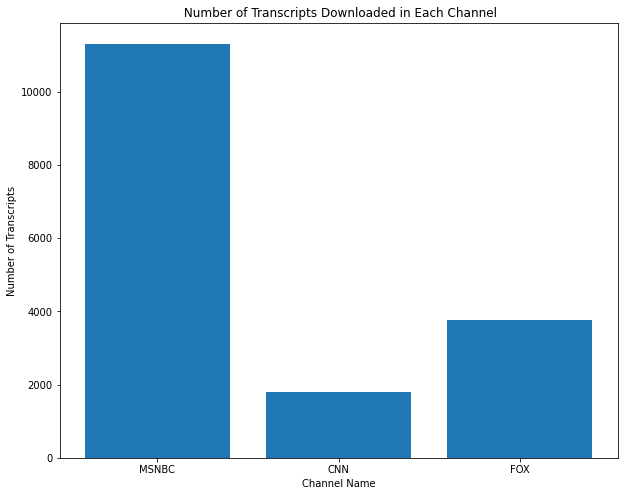

In [136]:
plt.figure(figsize = (10, 8))
plt.bar(channel, transcripts_count)
plt.title(" Number of Transcripts Downloaded in Each Channel")
plt.ylabel("Number of Transcripts")
plt.xlabel("Channel Name")
plt.savefig("freq_transcripts.jpg")

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [64]:
#sns.barplot(df_comments_msnbc['video_id'].nunique())

In [78]:

channel_comment_counts = [df_comments_msnbc['uniqueAuthorId'].nunique(), df_comments_cnn['uniqueAuthorId'].nunique(),
                         df_comments_fox['uniqueAuthorId'].nunique()]

channel = ["MSNBC", "CNN", "FOX"]

channel_comment_counts = [x/1000000 for x in channel_comment_counts]

In [79]:
channel_comment_counts

[1.286851, 0.847016, 0.979856]

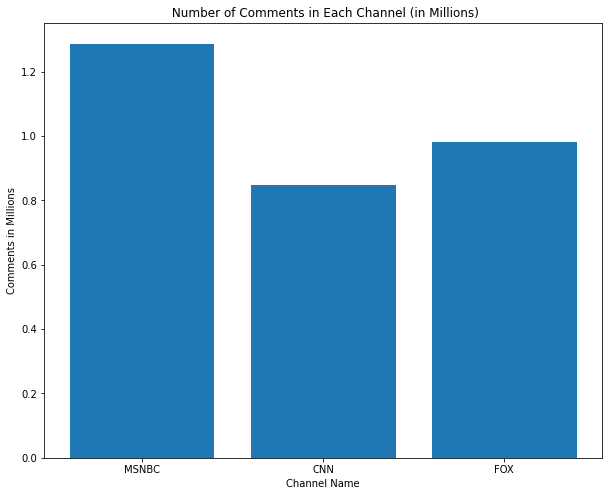

In [91]:
plt.figure(figsize = (10, 8))
plt.bar(channel, channel_comment_counts)
plt.title(" Number of Comments in Each Channel (in Millions)")
plt.ylabel("Comments in Millions")
plt.xlabel("Channel Name")
plt.savefig("freq_comments.jpg")

In [89]:
channel_video_counts = [df_comments_msnbc['video_id'].nunique(), df_comments_cnn['videoId'].nunique(),
                         df_comments_fox['videoId'].nunique()]
channel = ["MSNBC", "CNN", "FOX"]
channel_video_counts = [x/1000 for x in channel_video_counts]

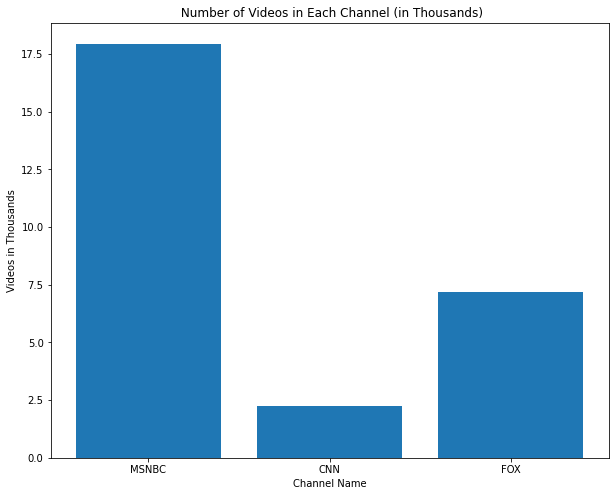

In [92]:
plt.figure(figsize = (10, 8))
plt.bar(channel, channel_video_counts)
plt.title(" Number of Videos in Each Channel (in Thousands)")
plt.ylabel("Videos in Thousands")
plt.xlabel("Channel Name")
plt.savefig("counts_videos.jpg")

In [30]:
df_comments_msnbc_unique = df_comments_msnbc[df_comments_msnbc['uniqueAuthorId'].isin(list(unique_authors_all)[:1000])]

In [31]:
df_comments_fox_unique = df_comments_fox[df_comments_fox['uniqueAuthorId'].isin(list(unique_authors_all)[:1000])]

In [32]:
df_comments_cnn_unique = df_comments_cnn[df_comments_cnn['uniqueAuthorId'].isin(list(unique_authors_all)[:1000])]

In [37]:
df_comments_cnn_unique['uniqueAuthorId'].nunique()

1000

In [46]:
df_comments_msnbc_unique.drop_duplicates(['uniqueAuthorId'], ignore_index = True, inplace = True)
df_comments_fox_unique.drop_duplicates(['uniqueAuthorId'], ignore_index = True, inplace = True)
df_comments_cnn_unique.drop_duplicates(['uniqueAuthorId'], ignore_index = True, inplace = True)

/tmp/ipykernel_1521051/3442951811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comments_msnbc_unique.drop_duplicates(['uniqueAuthorId'], ignore_index = True, inplace = True)
/tmp/ipykernel_1521051/3442951811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comments_fox_unique.drop_duplicates(['uniqueAuthorId'], ignore_index = True, inplace = True)
/tmp/ipykernel_1521051/3442951811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [47]:
df_comments_msnbc_unique.shape, df_comments_fox_unique.shape, df_comments_cnn_unique.shape

((1000, 13), (1000, 13), (1000, 13))

In [ ]:
# 1. Mallikarjuna - MSNBC and Fox News
# 2. Pravallika - MSNBC and CNN
# 3. Rupa - CNN and Fox News

In [48]:
df_comments_cnn_unique.to_csv("commments_unique_users_from_CNN.csv", index = False)

In [49]:
df_comments_fox_unique.to_csv("commments_unique_users_from_Fox.csv", index = False)

In [50]:
df_comments_msnbc_unique.to_csv("commments_unique_users_from_MSNBC.csv", index = False)